In [1]:
import os
working_dir = os.getcwd()
print(f"You are now working in {working_dir}")
print("If you need to change to the parent directory, run the cell below")

You are now working in c:\Users\fredd\Desktop\Studier\Project5\mushrooms\Mushroom_edible_gallery\jupyter_notebooks
If you need to change to the parent directory, run the cell below


In [2]:
os.chdir(os.path.dirname(working_dir))

In [3]:
working_dir = os.getcwd()
print(f"You have now changed your working directory to {working_dir}")

You have now changed your working directory to c:\Users\fredd\Desktop\Studier\Project5\mushrooms\Mushroom_edible_gallery



## Split data into train/validation/test sets

In [ ]:
import os
import shutil
import random
import joblib

def split_train_validation_test_images(image_dir, train_set_ratio, validation_set_ratio, test_set_ratio):
    
    # Check if the ratios are set to the correct total amount
    if train_set_ratio + validation_set_ratio + test_set_ratio != 1.0:
        print("The total of train_set_ratio, validation_set_ratio and test_set_ratio should be 1.0")
        
    species = os.listdir(image_dir)
    if 'test' in species:
        pass
    else:
        # this will create train/validation/test folders with species labeled sub-folders
        for folder in ['train', 'validation', 'test']:
            for specie in species:
                os.makedirs(name=image_dir + '/' + folder + specie)
                
        for specie in species:
            files = os.listdir(image_dir + '/' + specie)
            random.shuffle(files)
            
            train_set_files_qty = int(len(files) * train_set_ratio)
            validation_set_files_qty = int(len(files) * validation_set_ratio)
            
            count = 1
            for image_name in files:
                if count <= train_set_files_qty:
                    # moves an image to the train set
                    shutil.move(image_dir + '/' + specie + '/' + image_name,
                                image_dir + '/train' + specie + '/' + image_name)
                    
                elif count <= (train_set_files_qty + validation_set_files_qty):
                    # moves an image to the validation set
                    shutil.move(image_dir + '/' + specie + '/' + image_name,
                                image_dir + '/validation' + specie + '/' + image_name)
                    
                else:
                    # moves an image to the test set
                    shutil.move(image_dir + '/' + specie + image_name,
                                image_dir + '/test' + specie + image_name)
                    
                count += 1
                
            os.rmdir(image_dir + '/' + specie)

In [ ]:
split_train_validation_test_images(image_dir=f"inputs/dataset/raw/MO_94",
                                   train_set_ratio=0.7,
                                   validation_set_ratio=0.1,
                                   test_set_ratio=0.2
                                   )

In [13]:
import sys
print(sys.executable)

C:\Users\fredd\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


Now lets call for the image distribution barplot function.<br>
So that we can see if the distribution in all sets are equal and not having a specie that has a lot more than the others.

In [15]:
import sys
import os

# Lägg till mappen där image_analysis.py ligger
sys.path.append(os.path.abspath('jupyter_notebooks/'))

from image_analysis import images_percentage_distribution

Test distribution



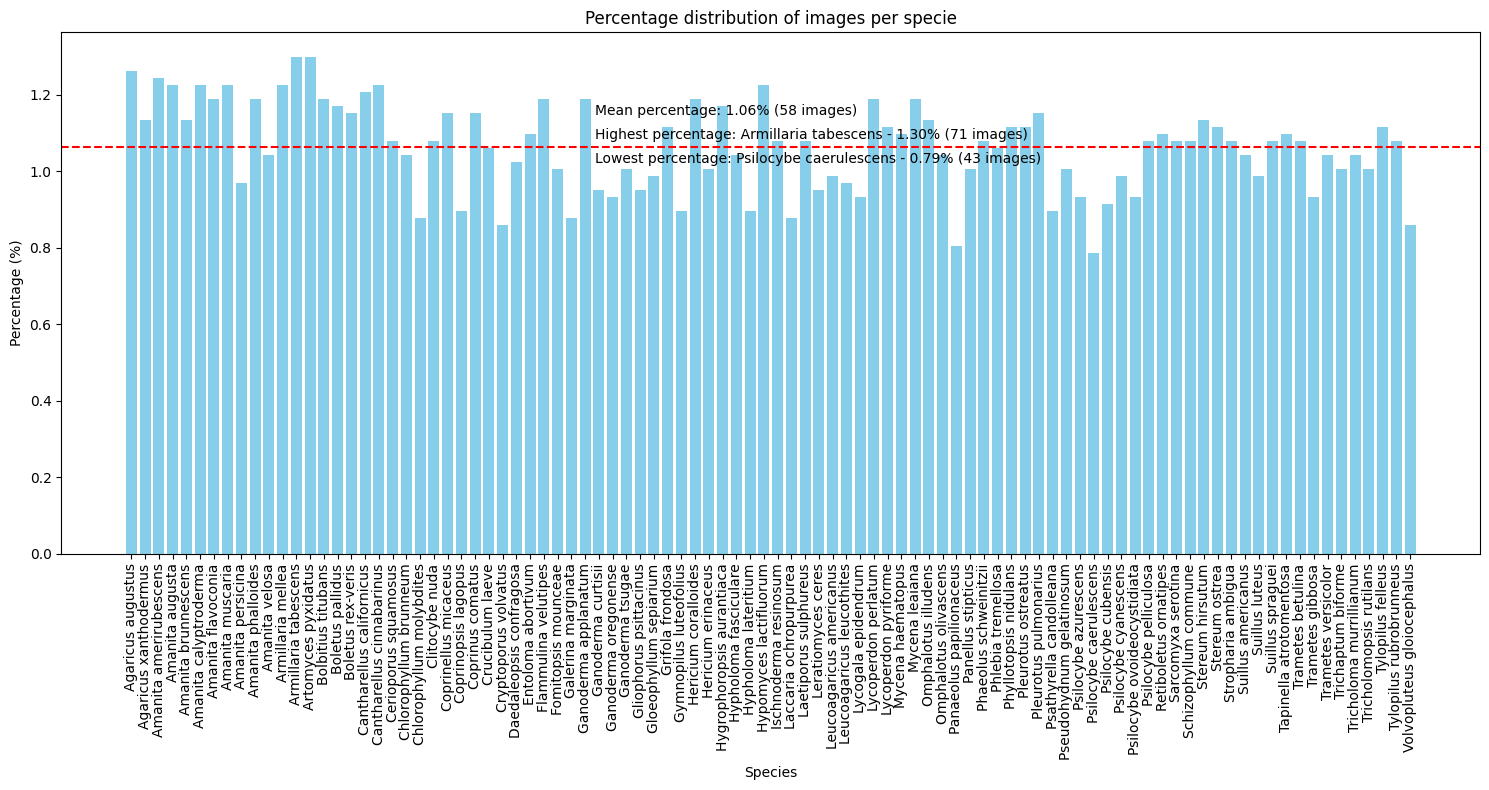


 Validation distribution



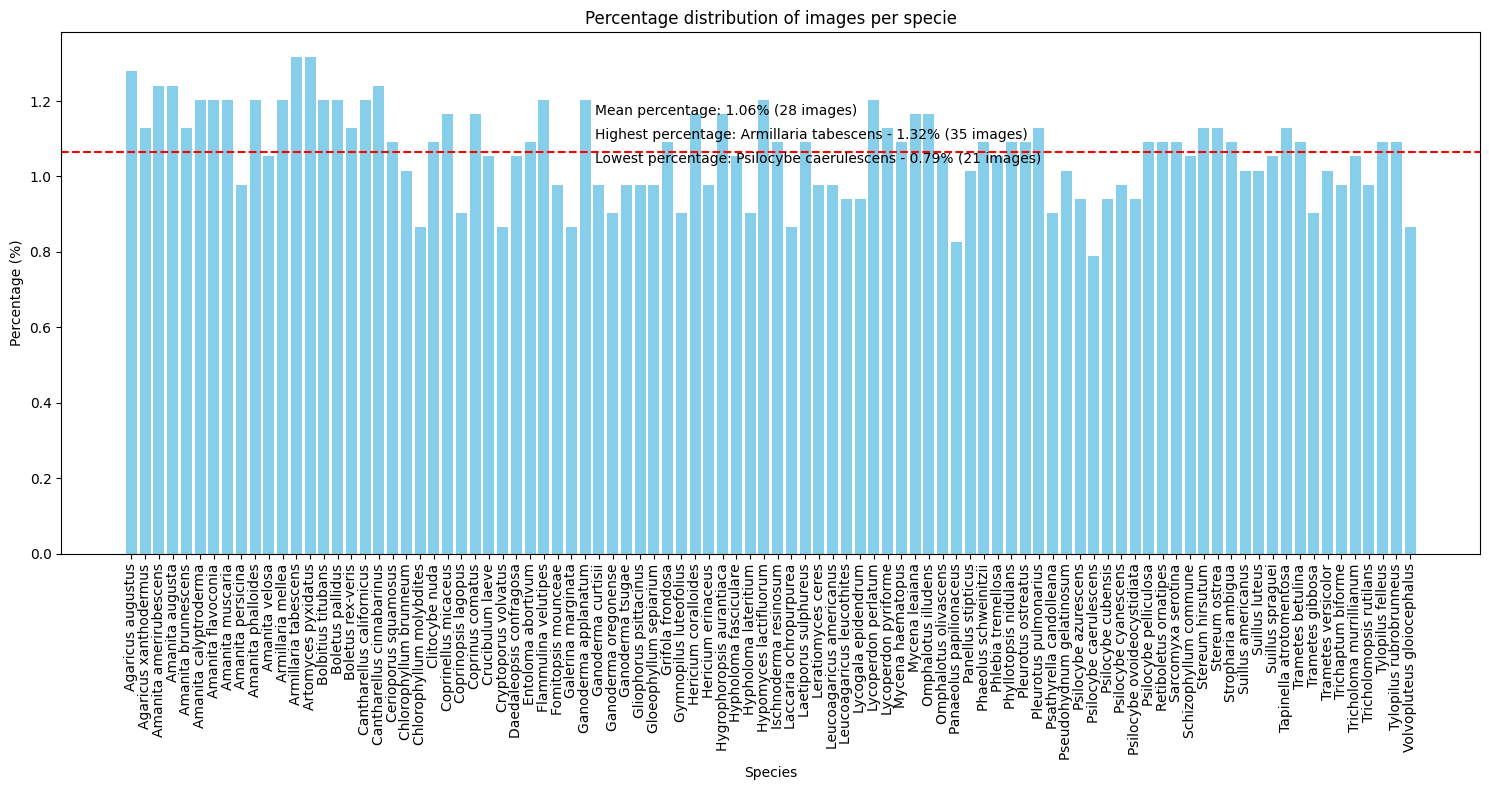


 Train distribution



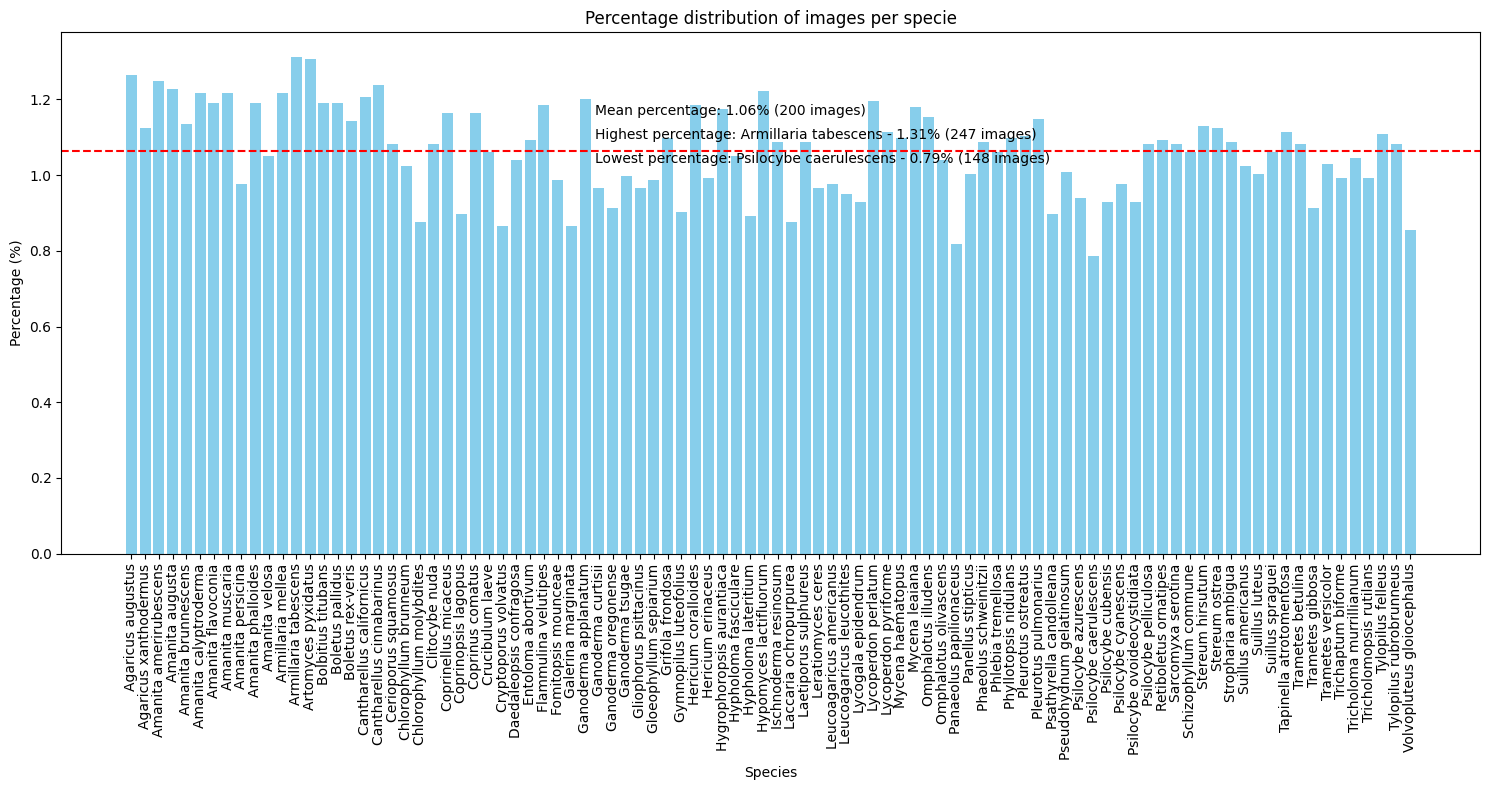

,Species,Count,Percentage
0,Agaricus augustus,238,1.263739
1,Agaricus xanthodermus,212,1.125684
2,Amanita amerirubescens,235,1.247810
3,Amanita augusta,231,1.226570
4,Amanita brunnescens,214,1.136303
...,...,...,...
89,Tricholoma murrillianum,197,1.046036
90,Tricholomopsis rutilans,187,0.992938
91,Tylopilus felleus,209,1.109754
92,Tylopilus rubrobrunneus,204,1.083205


In [17]:
from image_analysis import images_percentage_distribution
print("Test distribution\n")
images_percentage_distribution(image_dirs = 'input/dataset/raw/MO_94/test', save_path='outputs/v1/test_set_percentage_distribution.png')

print("\n Validation distribution\n")
images_percentage_distribution(image_dirs = 'input/dataset/raw/MO_94/validation', save_path='outputs/v1/validation_set_percentage_distribution.png')

print("\n Train distribution\n")
images_percentage_distribution(image_dirs = 'input/dataset/raw/MO_94/train', save_path='outputs/v1/train_set_percentage_distribution.png')
